In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
train_data=pd.read_csv('train1.csv')
test_data=pd.read_csv('test1.csv') 
print(train_data.shape, test_data.shape)

(9557, 143) (23856, 142)


In [2]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train_data.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

In [4]:
train_data.info

<bound method DataFrame.info of                 Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0     ID_279628684  190000.0       0      3       0     1       1     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2     ID_68de51c94       NaN       0      8       0     1       1     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...            ...       ...     ...    ...     ...   ...     ...   ...   
9552  ID_d45ae367d   80000.0       0      6       0     1       1     0   
9553  ID_c94744e07   80000.0       0      6       0     1       1     0   
9554  ID_85fc658f8   80000.0       0      6       0     1       1     0   
9555  ID_ced540c61   80000.0       0      6       0     1       1     0   
9556  ID_a38c64491   80000.0       0      6       0     1       1     0   

      v18q1  r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedj

In [5]:
test_data.head() 

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
test_data.info

<bound method DataFrame.info of                  Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0      ID_2f6873615       NaN       0      5       0     1       1     0   
1      ID_1c78846d2       NaN       0      5       0     1       1     0   
2      ID_e5442cf6a       NaN       0      5       0     1       1     0   
3      ID_a8db26a79       NaN       0     14       0     1       1     1   
4      ID_a62966799  175000.0       0      4       0     1       1     1   
...             ...       ...     ...    ...     ...   ...     ...   ...   
23851  ID_a065a7cad       NaN       1      2       1     1       1     0   
23852  ID_1a7c6953b       NaN       0      3       0     1       1     0   
23853  ID_07dbb4be2       NaN       0      3       0     1       1     0   
23854  ID_34d2ed046       NaN       0      3       0     1       1     0   
23855  ID_34754556f       NaN       0      3       0     1       1     0   

       v18q1  r4h1  ...  age  SQBescolari  SQBage  SQBh

In [7]:
train_data.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [8]:
train_data['v2a1']=train_data['v2a1'].fillna(train_data['v2a1'].mean())
train_data['v18q1']=train_data['v18q1'].fillna(train_data['v18q1'].mean())
train_data.isna().sum()


Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          5
agesq              0
Target             0
Length: 143, dtype: int64

In [9]:
std_scale_var1=MinMaxScaler()
std_scale_var1.fit(train_data[['v2a1']])
std_scale_var1.data_max_,std_scale_var1.data_min_
train_data['v2a1_s_s']=std_scale_var1.transform(train_data[['v2a1']])
std_scale_var2=MinMaxScaler()
std_scale_var2.fit(train_data[['age']])
std_scale_var2.data_max_,std_scale_var2.data_min_
train_data['age_s_s']=std_scale_var2.transform(train_data[['age']])
std_scale_var3=MinMaxScaler()
std_scale_var3.fit(train_data[['Target']])
std_scale_var3.data_max_,std_scale_var3.data_min_
train_data['target_s_s']=std_scale_var3.transform(train_data[['Target']])
train_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,v2a1_s_s,age_s_s,target_s_s
count,9.557000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292,0.070207,0.353645,0.767431
std,7.991617e+04,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.367324,0.680779,1.036574,...,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565,0.033957,0.222807,0.336522
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.652316e+05,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.404063,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000,0.070207,0.175258,0.666667
50%,1.652316e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.404063,0.000000,1.000000,...,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000,0.070207,0.319588,1.000000
75%,1.652316e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.404063,1.000000,2.000000,...,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000,0.070207,0.525773,1.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000,1.000000,1.000000,1.000000


In [10]:
c_t_d=['SQBmeaned','v2a1','Id','SQBage','agesq','SQBescolari','SQBedjefe','SQBovercrowding','SQBdependency','age','dependency','rooms','SQBhogar_total','SQBhogar_nin','Target']
train_data=train_data.drop(c_t_d,axis=1)
train_data.isna().sum()

hacdor        0
hacapo        0
v14a          0
refrig        0
v18q          0
             ..
area1         0
area2         0
v2a1_s_s      0
age_s_s       0
target_s_s    0
Length: 131, dtype: int64

In [11]:
train_data.head()

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,target_s_s
0,0,0,1,1,0,1.404063,0,1,1,0,...,0,0,0,0,0,1,0,0.080732,0.443299,1.0
1,0,0,1,1,1,1.000000,0,1,1,0,...,0,0,0,0,0,1,0,0.057362,0.690722,1.0
2,0,0,1,1,0,1.404063,0,0,0,0,...,0,0,0,0,0,1,0,0.070207,0.948454,1.0
3,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,0,0,0,1,0,0.076483,0.175258,1.0
4,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,0,0,0,1,0,0.076483,0.381443,1.0


In [12]:
test_data.isna().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 142, dtype: int64

In [13]:
test_data['v2a1']=test_data['v2a1'].fillna(test_data['v2a1'].mean())
test_data['v18q1']=test_data['v18q1'].fillna(test_data['v18q1'].mean())
test_data.isna().sum()

Id                  0
v2a1                0
hacdor              0
rooms               0
hacapo              0
                   ..
SQBhogar_nin        0
SQBovercrowding     0
SQBdependency       0
SQBmeaned          31
agesq               0
Length: 142, dtype: int64

In [14]:
std_scale_var1=MinMaxScaler()
std_scale_var1.fit(test_data[['v2a1']])
std_scale_var1.data_max_,std_scale_var1.data_min_
test_data['v2a1_s_s']=std_scale_var1.transform(test_data[['v2a1']])
std_scale_var2=MinMaxScaler()
std_scale_var2.fit(test_data[['age']])
std_scale_var2.data_max_,std_scale_var2.data_min_
test_data['age_s_s']=std_scale_var2.transform(test_data[['age']])
test_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,v2a1_s_s,age_s_s
count,2.385600e+04,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,...,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000,23856.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,...,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080,0.061301,0.355198
std,8.154029e+04,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.340208,0.713255,0.990171,...,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406,0.028584,0.223673
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.748726e+05,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.348517,0.000000,1.000000,...,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000,0.061301,0.164948
50%,1.748726e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.348517,0.000000,1.000000,...,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000,0.061301,0.329897
75%,1.748726e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.348517,1.000000,2.000000,...,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000,0.061301,0.525773
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,7.000000,...,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000,1.000000,1.000000


In [15]:
c_t_d=['SQBmeaned','v2a1','Id','SQBage','agesq','SQBescolari','SQBedjefe','SQBovercrowding','SQBdependency','age','dependency','rooms','SQBhogar_total','SQBhogar_nin']
test_data=test_data.drop(c_t_d,axis=1)
test_data.isna().sum()

hacdor      0
hacapo      0
v14a        0
refrig      0
v18q        0
           ..
lugar6      0
area1       0
area2       0
v2a1_s_s    0
age_s_s     0
Length: 130, dtype: int64

In [16]:
test_data.head()

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s
0,0,0,1,1,0,1.348517,1,1,2,0,...,1,0,0,0,0,0,1,0,0.061301,0.041237
1,0,0,1,1,0,1.348517,1,1,2,0,...,1,0,0,0,0,0,1,0,0.061301,0.422680
2,0,0,1,1,0,1.348517,1,1,2,0,...,1,0,0,0,0,0,1,0,0.061301,0.422680
3,0,0,1,1,1,1.000000,0,1,1,0,...,1,0,0,0,0,0,1,0,0.061301,0.608247
4,0,0,1,1,1,1.000000,0,0,0,0,...,1,0,0,0,0,0,1,0,0.061345,0.185567


In [17]:
test_data.dtypes

hacdor        int64
hacapo        int64
v14a          int64
refrig        int64
v18q          int64
             ...   
lugar6        int64
area1         int64
area2         int64
v2a1_s_s    float64
age_s_s     float64
Length: 130, dtype: object

In [18]:
train_data.columns

Index(['hacdor', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2',
       'v2a1_s_s', 'age_s_s', 'target_s_s'],
      dtype='object', length=131)

In [19]:
test_data.columns

Index(['hacdor', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1',
       'area2', 'v2a1_s_s', 'age_s_s'],
      dtype='object', length=130)

In [20]:
for i in train_data.columns:
    print("Number of unique values in {} \n The unique values are {}".format(i,len(train_data[i].unique()),train_data[i].unique()))

Number of unique values in hacdor 
 The unique values are 2
Number of unique values in hacapo 
 The unique values are 2
Number of unique values in v14a 
 The unique values are 2
Number of unique values in refrig 
 The unique values are 2
Number of unique values in v18q 
 The unique values are 2
Number of unique values in v18q1 
 The unique values are 7
Number of unique values in r4h1 
 The unique values are 6
Number of unique values in r4h2 
 The unique values are 9
Number of unique values in r4h3 
 The unique values are 9
Number of unique values in r4m1 
 The unique values are 6
Number of unique values in r4m2 
 The unique values are 7
Number of unique values in r4m3 
 The unique values are 9
Number of unique values in r4t1 
 The unique values are 7
Number of unique values in r4t2 
 The unique values are 11
Number of unique values in r4t3 
 The unique values are 13
Number of unique values in tamhog 
 The unique values are 13
Number of unique values in tamviv 
 The unique values are 14

In [21]:
null_values=pd.isnull(train_data)
train_data[null_values]

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,target_s_s
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
for i in test_data.columns:
    print("Number of unique values in {} \n The unique values are {}".format(i,len(test_data[i].unique()),test_data[i].unique()))

Number of unique values in hacdor 
 The unique values are 2
Number of unique values in hacapo 
 The unique values are 2
Number of unique values in v14a 
 The unique values are 2
Number of unique values in refrig 
 The unique values are 2
Number of unique values in v18q 
 The unique values are 2
Number of unique values in v18q1 
 The unique values are 7
Number of unique values in r4h1 
 The unique values are 7
Number of unique values in r4h2 
 The unique values are 8
Number of unique values in r4h3 
 The unique values are 8
Number of unique values in r4m1 
 The unique values are 6
Number of unique values in r4m2 
 The unique values are 9
Number of unique values in r4m3 
 The unique values are 10
Number of unique values in r4t1 
 The unique values are 9
Number of unique values in r4t2 
 The unique values are 9
Number of unique values in r4t3 
 The unique values are 13
Number of unique values in tamhog 
 The unique values are 13
Number of unique values in tamviv 
 The unique values are 15

In [23]:
null_values=pd.isnull(test_data)
test_data[null_values]

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

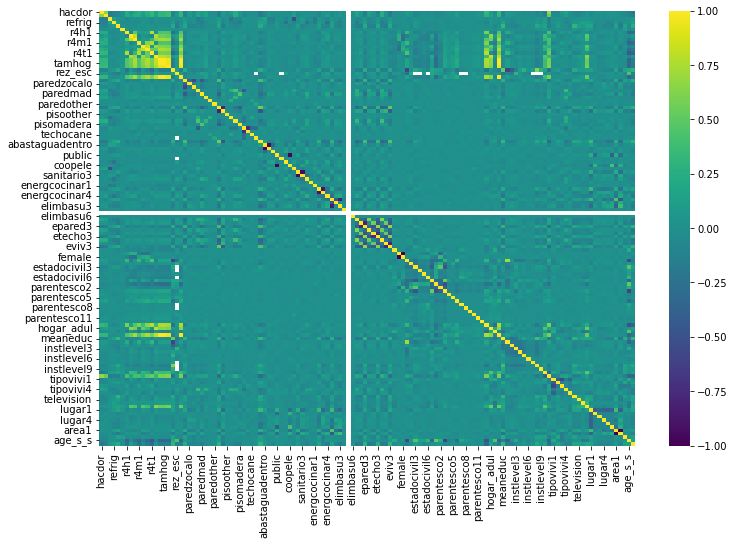

In [24]:
plt.figure(figsize=(12,8)) 
sns.heatmap(train_data.corr(), cmap='viridis')

<AxesSubplot:>

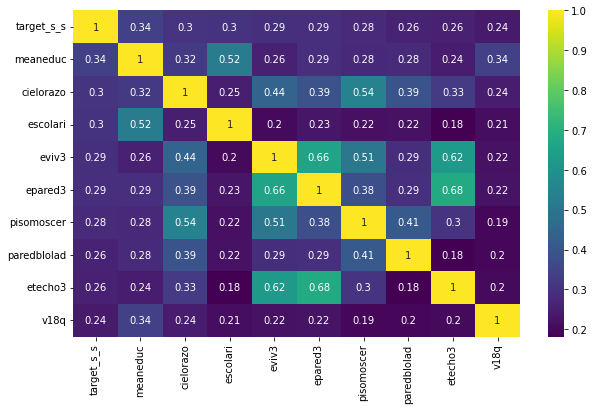

In [25]:
#Target correlation matrix
k=10 #number of variables for heatmap
cols=train_data.corr().nlargest(k,'target_s_s')['target_s_s'].index
cm=train_data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='viridis')

In [26]:
n_f_c=list(train_data._get_numeric_data().columns)
n_f_c

['hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'est

In [27]:
c_f_c=list(set(train_data.columns)-set(train_data._get_numeric_data().columns))
c_f_c

['edjefa', 'edjefe', 'idhogar']

In [28]:
n_f_c=list(test_data._get_numeric_data().columns)
n_f_c

['hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'v18q1',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'rez_esc',
 'hhsize',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'est

In [29]:
c_f_c=list(set(test_data.columns)-set(test_data._get_numeric_data().columns))
c_f_c

['edjefa', 'edjefe', 'idhogar']

In [30]:
le_jefa=LabelEncoder()
le_jefe=LabelEncoder()
le_gar=LabelEncoder()
train_data['edjefa']=le_jefa.fit_transform(train_data['edjefa'])
train_data['edjefe']=le_jefe.fit_transform(train_data['edjefe'])
train_data['idhogar']=le_gar.fit_transform(train_data['idhogar'])


In [31]:

test_data['edjefa']=le_jefa.fit_transform(test_data['edjefa'])
test_data['edjefe']=le_jefe.fit_transform(test_data['edjefe'])
test_data['idhogar']=le_gar.fit_transform(test_data['idhogar'])


In [32]:
train_data.idhogar

0        401
1        171
2        522
3        513
4        513
        ... 
9552    2499
9553    2499
9554    2499
9555    2499
9556    2499
Name: idhogar, Length: 9557, dtype: int64

In [33]:
train_data.edjefa

0       20
1       20
2        1
3       20
4       20
        ..
9552    20
9553    20
9554    20
9555    20
9556    20
Name: edjefa, Length: 9557, dtype: int64

In [34]:
train_data.edjefe

0        0
1        2
2       20
3        1
4        1
        ..
9552    19
9553    19
9554    19
9555    19
9556    19
Name: edjefe, Length: 9557, dtype: int64

In [35]:
std_scale_v1=MinMaxScaler()
std_scale_v1.fit(train_data[['idhogar']])
std_scale_v1.data_max_,std_scale_v1.data_min_
train_data['gar_s_s']=std_scale_v1.transform(train_data[['idhogar']])
std_scale_v2=MinMaxScaler()
std_scale_v2.fit(train_data[['edjefa']])
std_scale_v2.data_max_,std_scale_v2.data_min_
train_data['jefa_s_s']=std_scale_v2.transform(train_data[['edjefa']])
std_scale_v3=MinMaxScaler()
std_scale_v3.fit(train_data[['edjefe']])
std_scale_v3.data_max_,std_scale_v3.data_min_
train_data['jefe_s_s']=std_scale_v3.transform(train_data[['edjefe']])
train_data

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,target_s_s,gar_s_s,jefa_s_s,jefe_s_s
0,0,0,1,1,0,1.404063,0,1,1,0,...,0,0,1,0,0.080732,0.443299,1.000000,0.134248,0.952381,0.000000
1,0,0,1,1,1,1.000000,0,1,1,0,...,0,0,1,0,0.057362,0.690722,1.000000,0.057248,0.952381,0.095238
2,0,0,1,1,0,1.404063,0,0,0,0,...,0,0,1,0,0.070207,0.948454,1.000000,0.174757,0.047619,0.952381
3,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,1,0,0.076483,0.175258,1.000000,0.171744,0.952381,0.047619
4,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,1,0,0.076483,0.381443,1.000000,0.171744,0.952381,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.474227,0.333333,0.836625,0.952381,0.904762
9553,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.020619,0.333333,0.836625,0.952381,0.904762
9554,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.515464,0.333333,0.836625,0.952381,0.904762
9555,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.268041,0.333333,0.836625,0.952381,0.904762


In [36]:
c_t_d=['idhogar','edjefa','edjefe']
train_data=train_data.drop(c_t_d,axis=1)
train_data

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,target_s_s,gar_s_s,jefa_s_s,jefe_s_s
0,0,0,1,1,0,1.404063,0,1,1,0,...,0,0,1,0,0.080732,0.443299,1.000000,0.134248,0.952381,0.000000
1,0,0,1,1,1,1.000000,0,1,1,0,...,0,0,1,0,0.057362,0.690722,1.000000,0.057248,0.952381,0.095238
2,0,0,1,1,0,1.404063,0,0,0,0,...,0,0,1,0,0.070207,0.948454,1.000000,0.174757,0.047619,0.952381
3,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,1,0,0.076483,0.175258,1.000000,0.171744,0.952381,0.047619
4,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,1,0,0.076483,0.381443,1.000000,0.171744,0.952381,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.474227,0.333333,0.836625,0.952381,0.904762
9553,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.020619,0.333333,0.836625,0.952381,0.904762
9554,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.515464,0.333333,0.836625,0.952381,0.904762
9555,0,0,1,1,0,1.404063,0,2,2,1,...,0,1,0,1,0.033992,0.268041,0.333333,0.836625,0.952381,0.904762


In [37]:
test_data.idhogar

0        3230
1        3230
2        3230
3        2599
4         807
         ... 
23851    1659
23852    5963
23853    5963
23854    5963
23855    5963
Name: idhogar, Length: 23856, dtype: int64

In [38]:
test_data.edjefa

0         7
1         7
2         7
3        20
4         1
         ..
23851    20
23852    20
23853    20
23854    20
23855    20
Name: edjefa, Length: 23856, dtype: int64

In [39]:
test_data.edjefe

0        20
1        20
2        20
3         6
4        20
         ..
23851    15
23852    16
23853    16
23854    16
23855    16
Name: edjefe, Length: 23856, dtype: int64

In [40]:
std_scale_v1=MinMaxScaler()
std_scale_v1.fit(test_data[['idhogar']])
std_scale_v1.data_max_,std_scale_v1.data_min_
test_data['gar_s_s']=std_scale_v1.transform(test_data[['idhogar']])
std_scale_v2=MinMaxScaler()
std_scale_v2.fit(test_data[['edjefa']])
std_scale_v2.data_max_,std_scale_v2.data_min_
test_data['jefa_s_s']=std_scale_v2.transform(test_data[['edjefa']])
std_scale_v3=MinMaxScaler()
std_scale_v3.fit(test_data[['edjefe']])
std_scale_v3.data_max_,std_scale_v3.data_min_
test_data['jefe_s_s']=std_scale_v3.transform(test_data[['edjefe']])
test_data

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar4,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,gar_s_s,jefa_s_s,jefe_s_s
0,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.041237,0.439396,0.333333,0.952381
1,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.422680,0.439396,0.333333,0.952381
2,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.422680,0.439396,0.333333,0.952381
3,0,0,1,1,1,1.000000,0,1,1,0,...,0,0,0,1,0,0.061301,0.608247,0.353557,0.952381,0.285714
4,0,0,1,1,1,1.000000,0,0,0,0,...,0,0,0,1,0,0.061345,0.185567,0.109781,0.047619,0.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,1,1,1,0,1.348517,0,2,2,1,...,0,0,1,0,1,0.061301,0.103093,0.225684,0.952381,0.714286
23852,0,0,1,1,0,1.348517,0,1,1,0,...,0,0,1,0,1,0.061301,0.556701,0.811182,0.952381,0.761905
23853,0,0,1,1,0,1.348517,0,1,1,0,...,0,0,1,0,1,0.061301,0.123711,0.811182,0.952381,0.761905
23854,0,0,1,1,0,1.348517,0,1,1,0,...,0,0,1,0,1,0.061301,0.123711,0.811182,0.952381,0.761905


In [41]:
c_t_d=['idhogar','edjefa','edjefe']
test_data=test_data.drop(c_t_d,axis=1)
test_data

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar4,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,gar_s_s,jefa_s_s,jefe_s_s
0,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.041237,0.439396,0.333333,0.952381
1,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.422680,0.439396,0.333333,0.952381
2,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.422680,0.439396,0.333333,0.952381
3,0,0,1,1,1,1.000000,0,1,1,0,...,0,0,0,1,0,0.061301,0.608247,0.353557,0.952381,0.285714
4,0,0,1,1,1,1.000000,0,0,0,0,...,0,0,0,1,0,0.061345,0.185567,0.109781,0.047619,0.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,1,1,1,1,0,1.348517,0,2,2,1,...,0,0,1,0,1,0.061301,0.103093,0.225684,0.952381,0.714286
23852,0,0,1,1,0,1.348517,0,1,1,0,...,0,0,1,0,1,0.061301,0.556701,0.811182,0.952381,0.761905
23853,0,0,1,1,0,1.348517,0,1,1,0,...,0,0,1,0,1,0.061301,0.123711,0.811182,0.952381,0.761905
23854,0,0,1,1,0,1.348517,0,1,1,0,...,0,0,1,0,1,0.061301,0.123711,0.811182,0.952381,0.761905


In [42]:
new_train_data=pd.concat([train_data],axis=1)
new_train_data.head()

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,target_s_s,gar_s_s,jefa_s_s,jefe_s_s
0,0,0,1,1,0,1.404063,0,1,1,0,...,0,0,1,0,0.080732,0.443299,1.0,0.134248,0.952381,0.000000
1,0,0,1,1,1,1.000000,0,1,1,0,...,0,0,1,0,0.057362,0.690722,1.0,0.057248,0.952381,0.095238
2,0,0,1,1,0,1.404063,0,0,0,0,...,0,0,1,0,0.070207,0.948454,1.0,0.174757,0.047619,0.952381
3,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,1,0,0.076483,0.175258,1.0,0.171744,0.952381,0.047619
4,0,0,1,1,1,1.000000,0,2,2,1,...,0,0,1,0,0.076483,0.381443,1.0,0.171744,0.952381,0.047619


In [43]:
new_train_data.isna().sum()

hacdor        0
hacapo        0
v14a          0
refrig        0
v18q          0
             ..
age_s_s       0
target_s_s    0
gar_s_s       0
jefa_s_s      0
jefe_s_s      0
Length: 131, dtype: int64

In [44]:
new_test_data=pd.concat([test_data],axis=1)
new_test_data.head()

,hacdor,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,...,lugar4,lugar5,lugar6,area1,area2,v2a1_s_s,age_s_s,gar_s_s,jefa_s_s,jefe_s_s
0,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.041237,0.439396,0.333333,0.952381
1,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.422680,0.439396,0.333333,0.952381
2,0,0,1,1,0,1.348517,1,1,2,0,...,0,0,0,1,0,0.061301,0.422680,0.439396,0.333333,0.952381
3,0,0,1,1,1,1.000000,0,1,1,0,...,0,0,0,1,0,0.061301,0.608247,0.353557,0.952381,0.285714
4,0,0,1,1,1,1.000000,0,0,0,0,...,0,0,0,1,0,0.061345,0.185567,0.109781,0.047619,0.952381


In [45]:
new_test_data.isna().sum()

hacdor      0
hacapo      0
v14a        0
refrig      0
v18q        0
           ..
v2a1_s_s    0
age_s_s     0
gar_s_s     0
jefa_s_s    0
jefe_s_s    0
Length: 130, dtype: int64

In [46]:
X=new_train_data.drop(['target_s_s'],axis=1)
y=new_train_data[['target_s_s']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)
rfc=RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions=rfc.predict(X_test)
print(classification_report(y_test,predictions))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').